#**Background & Problem Statement:**

<br> **Background** <br>

One of the main problems plaguing our virtual world is the spread of misinformation through fake news. “Fake news” refers to the deliberate spread of misleading information. Misinformation alone is not the only negative effect of fake news. Today, the issue is how misinformation in fake news is  being used. Fake news is often used in our media to polarize and manipulate the general public.

<br> **Problem Statement** <br>

Given the severity of fake news, the prevention of spreading misinformation should be of utmost importance on the internet. Our goal in this project is to use the machine learning techniques taught in this course on our dataset to predict if a website is providing real or fraudulent news.

<br>

For this project, we are creating two machine learning models that will accurately classify real and fake news given a set of data that characterizes each piece of news. To build the best models possible, we will clean our dataset through means of preprocessing, create our models, and then use hyper-parameter optimization to make our model as accurate as possible.

<br> **Measures of Success** <br>

Our measure of success in this project will be the accuracy of the model provided via functions available through sklearn library and the area under the ROC curve.

###**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from pandas import DataFrame
from sklearn.feature_extraction.text import CountVectorizer

from collections import OrderedDict

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

#needed for SVC model
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC # "Support vector classifier"
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

from sklearn.metrics import f1_score


#**Dataset**


**Load Data**


In [ ]:
#import data
data = pd.read_csv("news_articles.csv")
data.head()

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0


###**Description of Dataset:** <br>
The dataset we are using comes from Kaggle. The attributes for each instance are:
  * "Author" - (String) Author of the article
  * "Published" - (String) Data the article was published
  * "Title" - (String) Title of the article
  * "Text" - (String) All of the text contained in the article
  * "Language" - (String) Language the article is written in
  * "Site_url" - (String) URL of the website hosting the article
  * "Main_img_url" - (String) URL of the main image that appears on the webpage where the article is
  * "Type" - (String) categorical value defining what type of article the instance is
  * "Label" - (Classifier/Label) this is the label of each instance. The label is either "Real" or "Fake"
  * "Title_Without_Stopwords" - (String) The title with stopwords removed
  * "Text_Without_Stopwords" - (String) The text within the article with stopwords removed
  * "HasImage" - (Binary) True or False depending on if the article has an image with it

In [ ]:
#print some information about the dataset and the shape of the dataset
print(data.info())
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2096 entries, 0 to 2095
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   author                   2096 non-null   object 
 1   published                2096 non-null   object 
 2   title                    2096 non-null   object 
 3   text                     2050 non-null   object 
 4   language                 2095 non-null   object 
 5   site_url                 2095 non-null   object 
 6   main_img_url             2095 non-null   object 
 7   type                     2095 non-null   object 
 8   label                    2095 non-null   object 
 9   title_without_stopwords  2094 non-null   object 
 10  text_without_stopwords   2046 non-null   object 
 11  hasImage                 2095 non-null   float64
dtypes: float64(1), object(11)
memory usage: 196.6+ KB
None
(2096, 12)


###**Shape of Dataset**
Our dataset has 2096 isntances with 12 attributes for each instance.

**Counting missing values in each column**

In [ ]:
#print sum of null values in each attribute of dataset
data.isna().sum()

author                      0
published                   0
title                       0
text                       46
language                    1
site_url                    1
main_img_url                1
type                        1
label                       1
title_without_stopwords     2
text_without_stopwords     50
hasImage                    1
dtype: int64

**Drop Null Values**

In [ ]:
#drop null values
new_data = data.dropna()

In [ ]:
#visualize counts of languages
new_data.language.value_counts()

english    1967
german       72
ignore        3
french        2
spanish       1
Name: language, dtype: int64

**Here we set the dataset equal to only the instances where the article is written in English**

In [ ]:
#set dataset equal to only the instances where the article is written in english
new_data = new_data.query("language == 'english'")
new_data.count()

author                     1967
published                  1967
title                      1967
text                       1967
language                   1967
site_url                   1967
main_img_url               1967
type                       1967
label                      1967
title_without_stopwords    1967
text_without_stopwords     1967
hasImage                   1967
dtype: int64

###**Understanding the Variables**

In [ ]:
#print the unique values for the attribute type
new_data['type'].unique()

array(['bias', 'conspiracy', 'fake', 'bs', 'satire', 'hate', 'junksci',
       'state'], dtype=object)

**Possible types of articles:**
  * Bias
  * Conspiracy
  * Fake
  * BS
  * Satire
  * Hate
  * JunkSci
  * State

**Count how many of each type to help visualize the dataset:**

In [ ]:
#Counting by types
for key,count in new_data.type.value_counts().iteritems():
    print(f"{key}:\t{count}")

#Getting Total Rows
print(f"Total Records:\t{new_data.shape[0]}")

bs:	524
conspiracy:	430
bias:	389
hate:	241
satire:	146
state:	120
junksci:	102
fake:	15
Total Records:	1967


<ipython-input-105-cea37c7b417e>:2: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



####**Visualizing the data**

In [ ]:
#sunburst chart to show label vs type
fig = px.sunburst(new_data, path=['label', 'type'])
fig.show()

###**A Step Further Into the Data**

**Here we implement a couple functions so we can look further into "Text" attribute.**

In [ ]:
#function to get top unigrams
def get_top_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
#function to get top bigrams
def get_top_bigram(corpus, n=None):
    vec = CountVectorizer(stop_words='english', ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

**Using the functions we just made, we plot a bar graph depicted the top unigrams in the "Text" attribute.**

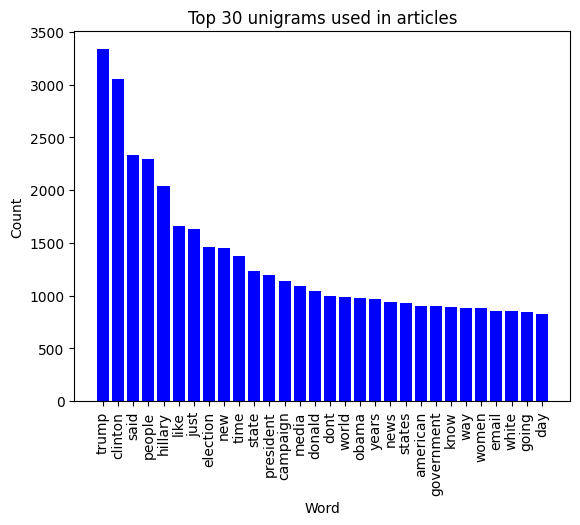

In [ ]:
# Get the top 30 unigrams from the 'text' column
common_words = get_top_words(new_data['text'], 30)

# Create a DataFrame from the list of common words
df = pd.DataFrame(common_words, columns=['word', 'count'])

# Sort the DataFrame in descending order by 'count'
df = df.sort_values('count', ascending=False)

# Create a bar chart using Matplotlib
plt.bar(df['word'], df['count'], color='blue')
plt.xticks(rotation=90)
plt.title('Top 30 unigrams used in articles')
plt.xlabel('Word')
plt.ylabel('Count')
plt.show()



In [ ]:
#print top unigrams throughout all of the text attributes
df.head()

,word,count
0,trump,3336
1,clinton,3049
2,said,2337
3,people,2294
4,hillary,2035


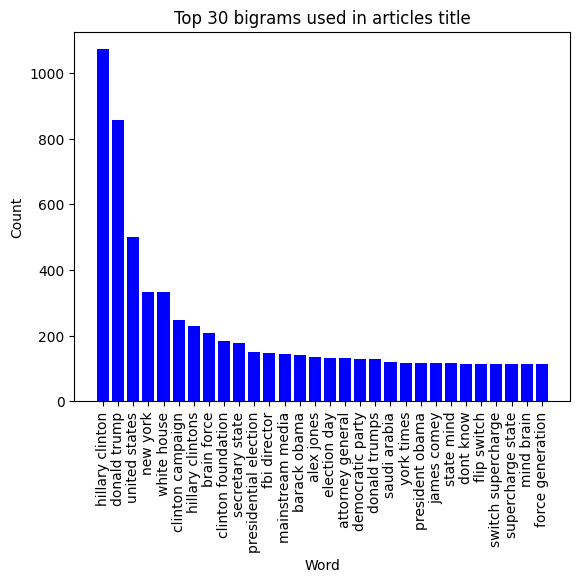

In [ ]:
common_words2 = get_top_bigram(new_data['text'], 30)
df2 = pd.DataFrame(common_words2, columns=['word', 'count'])

# Sort the DataFrame in descending order by 'count'
df2 = df2.sort_values('count', ascending=False)

# Create a bar chart using Matplotlib
plt.bar(df2['word'], df2['count'], color='blue')
plt.xticks(rotation=90)
plt.title('Top 30 bigrams used in articles title')
plt.xlabel('Word')
plt.ylabel('Count')
plt.show()

#**Train Models**


**Configuring dataset for models**

In [ ]:
type1 = {'bias': 0, 'conspiracy': 1,'fake': 2,'bs': 3,'satire': 4, 'hate': 5,'junksci': 6, 'state': 7}
new_data.type = [type1[item] for item in new_data.type]

In [ ]:
#create new variable in the dataset for the frequency of the top two unigrams
new_data['trump_frequency'] = new_data['text_without_stopwords'].str.count(r'\b[Tt]rump\b')
new_data['clinton_frequency'] = new_data['text_without_stopwords'].str.count(r'\b[Cc]linton\b')

**Set up X and Y values**

In [ ]:
#set up our X and Y values
X = new_data.drop(['label', 'language'], axis=1) #drop language attribute
y = new_data['label']

**Here we split our data into a training and a testing set.**

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##**SVC Model**



**Here we perform some preprocessing to set the dataset up to be used for our models.**

In [ ]:
# Define the column transformer with the necessary preprocessing steps
preprocessor = ColumnTransformer([
    ('num', SimpleImputer(strategy='median'), ['type', 'hasImage']),
    ('text', TfidfVectorizer(stop_words='english'), 'text_without_stopwords')
])

In [ ]:
# Preprocess the features using the column transformer
X_train_preprocessed = preprocessor.fit_transform(X_train)
# Preprocess the features using the column transformer on the testing set
X_test_preprocessed = preprocessor.transform(X_test)

**Here we create our SVC model**

In [ ]:
# Train an SVM model on the preprocessed training set and evaluate it on the preprocessed testing set
svm_model = SVC(kernel='linear', C=100)
svm_model.fit(X_train_preprocessed, y_train)
svm_score = svm_model.score(X_train_preprocessed, y_train)
print('SVM accuracy:', svm_score)

SVM accuracy: 0.9974570883661793


**Here we go ahead and test the model on our test data before we implement HPO so we can get a baseline and measure the difference HPO has.**

In [ ]:
#try with test data to see score before HPO
svm_score = svm_model.score(X_test_preprocessed, y_test)
print('SVM test accuracy:', svm_score)

SVM test accuracy: 0.7461928934010152


In [ ]:
y_pred = svm_model.predict(X_test_preprocessed)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Fake       0.79      0.81      0.80       249
        Real       0.66      0.64      0.65       145

    accuracy                           0.75       394
   macro avg       0.73      0.72      0.73       394
weighted avg       0.74      0.75      0.75       394



**Here is the accuracy of our SVM score on the test data before performing hyperparameter tuning**
<br>
* SVM accuracy: 0.7461928934010152

###**Hyperparameter Tuning on the SVC Model**

**Here we set up our paramaters to be used in our SVC Model**

In [ ]:
# cv - cross-validation generator - required for RandomizedSearchCV
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
cv.get_n_splits(X_train_preprocessed, y_train)

15

In [ ]:
# required model for RandomizedSearchCV
model = SVC(decision_function_shape='ovr')

In [ ]:
# set up our potential hyperparamters
tuned_parameters = [
    {"kernel": ["rbf"], "gamma": [1e-3, 1e-4], "C": [1, 10, 100]},
    {"kernel": ["linear"], "C": [1, 10, 100]},
    {"kernel": ["poly"], "degree": [2, 3, 4], "C": [1, 10, 100]}
]

####**HPO for SVC Model**

**We use RandomizedSearchCV function to find the optimal parameters**

In [ ]:
# Define the search method
search = RandomizedSearchCV(model, tuned_parameters, n_iter=12, cv=cv, scoring='accuracy', random_state=1)

# Fit the search method to the training data
search.fit(X_train_preprocessed, y_train)

# Print the best-tuned parameters and the test accuracy
print("Best parameters:", search.best_params_)

Best parameters: {'kernel': 'rbf', 'gamma': 0.001, 'C': 100}


### **Result from hyperparameter tuning on SVC model:**
* Best parameters:
  * 'kernel': 'rbf'
  * 'gamma': 0.001
  * 'C': 100

####**Re-train your model using the optimal hyper-parameters**

In [ ]:
# Train an SVM model on the preprocessed training set and evaluate it on the preprocessed testing set using the
# optimized paramters we just discovered
svm_model = SVC(kernel='rbf', gamma=0.001, C=100)
svm_model.fit(X_train_preprocessed, y_train)
svm_score = svm_model.score(X_test_preprocessed, y_test) # !!Should this be y_train? - jt
print('SVM accuracy:', svm_score)

SVM accuracy: 0.9441624365482234


**SVC Accuracy on Test Data after implementing HPO:**
* 0.9441624365482234

In [ ]:
# make predictions on test set
y_pred = svm_model.predict(X_test_preprocessed)

**Here we print the results of our SVC Model on the test data after using HPO to improve our model**

In [ ]:
# print results
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Fake       1.00      0.92      0.95       249
        Real       0.87      0.99      0.93       145

    accuracy                           0.94       394
   macro avg       0.93      0.95      0.94       394
weighted avg       0.95      0.94      0.94       394



**Here we use a area under the ROC curve to evaluate our model**

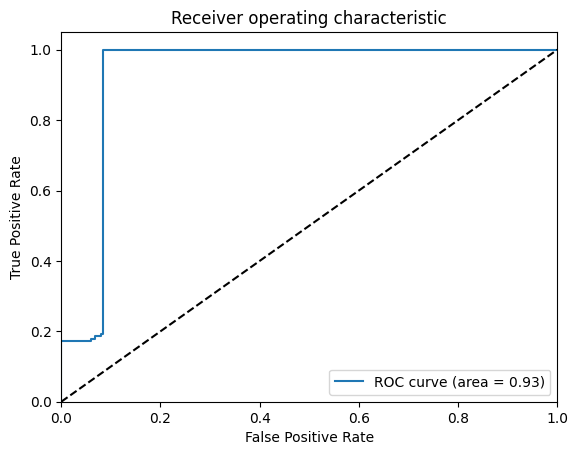

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Encode the labels as 0 and 1
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)

# Generate predicted probabilities for the testing set
y_pred_prob = svm_model.decision_function(X_test_preprocessed)

# Calculate the false positive rate and true positive rate for different thresholds
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_prob)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random guessing curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


**As shown in the above graph, our model produces a ROC curve with and area of .93 which is quite accurate.**

##**Logistic Regression Model**

**Here we set up the data for the Logistic Regression Model.**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(new_data[['author', 'published', 'site_url', 'type', 'title_without_stopwords', 'text_without_stopwords']], new_data['label'], test_size=0.2, random_state=42)

# Vectorize the text features using TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_text = vectorizer.fit_transform(X_train['text_without_stopwords'])
X_test_text = vectorizer.transform(X_test['text_without_stopwords'])


**Here we build the model and test it wil the Test Data.**

In [ ]:
# Train a logistic regression model
clf = LogisticRegression()
clf.fit(X_train_text, y_train)

# Evaluate the performance of the model
y_pred = clf.predict(X_test_text)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, pos_label='Real'))
print("Recall:", recall_score(y_test, y_pred, pos_label='Real'))
print("F1-score:", f1_score(y_test, y_pred, pos_label='Real'))

Accuracy: 0.7284263959390863
Precision: 0.88
Recall: 0.30344827586206896
F1-score: 0.45128205128205123


In [ ]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

        Fake       0.98      0.71      0.82       344
        Real       0.30      0.88      0.45        50

    accuracy                           0.73       394
   macro avg       0.64      0.79      0.64       394
weighted avg       0.89      0.73      0.77       394



**As we can see, our initial accuracy is 73% which is not the greatest.**

####**HPO for Logistic Regression Model**

**Next, we try to implement some HPO to improve the accuracy of our Logistic Regression Model**

In [ ]:
# Define hyperparameters to search
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2'], 'solver': ['liblinear', 'lbfgs', 'newton-cg']}

# Perform grid search
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=10)
grid_search.fit(X_train_text, y_train)

# Get best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)


Best hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


### **Result from hyperparameter tuning on Logistic Regression model:**
* Best parameters:
  * 'C': 10
  * 'Penalty': 'l2'
  * 'Solver': liblinear

**Now we build our Logistic Regression model again using our optimal hyper-parameters**

In [ ]:
# Train a logistic regression model with the best hyperparameters
clf = LogisticRegression(C=10, penalty='l2', solver='liblinear')
clf.fit(X_train_text, y_train)

# Evaluate the performance of the model
y_pred = clf.predict(X_test_text)
logmod_acc = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, pos_label='Real'))
print("Recall:", recall_score(y_test, y_pred, pos_label='Real'))
print("F1-score:", f1_score(y_test, y_pred, pos_label='Real'))

Accuracy: 0.7842639593908629
Precision: 0.8191489361702128
Recall: 0.5310344827586206
F1-score: 0.6443514644351465


In [ ]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

        Fake       0.93      0.77      0.85       300
        Real       0.53      0.82      0.64        94

    accuracy                           0.78       394
   macro avg       0.73      0.80      0.74       394
weighted avg       0.84      0.78      0.80       394



####**Results of HPO on Logistic Regression model:**
* As shown in the confusion matrix above, our new model using HPO now has an accuracy of 78%. This is not the results we expected after implementing HPO.

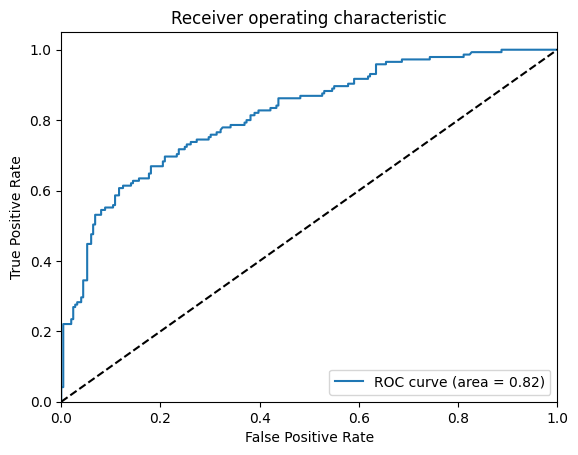

In [ ]:
# Convert the string labels to binary-encoded 0 and 1 labels
y_test_encoded = le.fit_transform(y_test)

# Assuming your model is already trained and you have obtained the predicted probabilities on the test set
y_pred_proba = clf.predict_proba(X_test_text)[:, 1]
fpr, tpr, _ = roc_curve(y_test_encoded, y_pred_proba)
roc_auc_log = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_log)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


##**Neural Network Model**
####**Note - given the accuracy of this model, we did not include it in the presentation. We worked hard to get it working but could not get the accuracy we wanted**

<br>**Here we start to build our Neural Network Model**

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier

X = new_data.drop(['label', 'language', 'title', 'text'], axis=1) #drop language attribute
y = new_data['label']

# Split the dataset into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state=42)

# Find the maximum length of the text in dataset
maxlen = max([len(x.split()) for x in train_data['text_without_stopwords']])

# Convert the text data into numerical sequences
tokenizer = Tokenizer(num_words=100000, oov_token='<OOV>')
tokenizer.fit_on_texts(train_data['text_without_stopwords'])
train_sequences = tokenizer.texts_to_sequences(train_data['text_without_stopwords'])
test_sequences = tokenizer.texts_to_sequences(test_data['text_without_stopwords'])

# Pad the sequences so that they are all the same length
train_data = pad_sequences(train_sequences, maxlen=maxlen)
test_data = pad_sequences(test_sequences, maxlen=maxlen)

# Convert the labels into numerical values
train_labels = np.where(train_labels=='Real', 1, 0)
test_labels = np.where(test_labels=='Real', 1, 0)

train_data

array([[   0,    0,    0, ...,  558, 1754,  521],
       [   0,    0,    0, ...,  451,    4,  232],
       [   0,    0,    0, ...,   70,  567,  621],
       ...,
       [   0,    0,    0, ...,  147, 1248,  213],
       [   0,    0,    0, ..., 4212, 1200,  985],
       [   0,    0,    0, ..., 1233,  485,  797]], dtype=int32)

In [ ]:
print('Train: X=%s, y=%s' % (train_data.shape, train_labels.shape))
print('Test: X=%s, y=%s' % (test_data.shape, test_labels.shape))

Train: X=(1573, 3015), y=(1573,)
Test: X=(394, 3015), y=(394,)


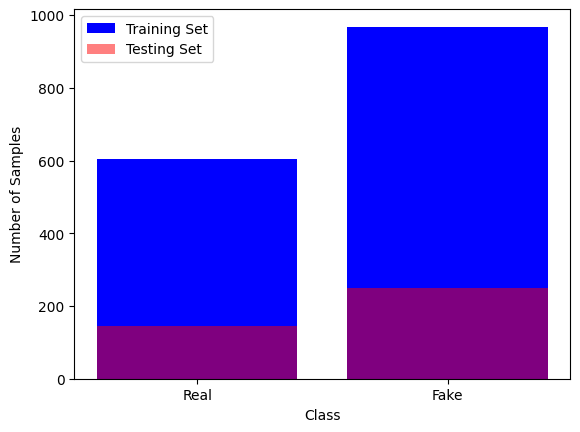

In [ ]:
# Calculate the class distribution in the training and testing sets
train_classes = train_labels.sum()
test_classes = test_labels.sum()

# Plot the class distribution
fig, ax = plt.subplots()
ax.bar(['Real', 'Fake'], [train_classes, len(train_labels)-train_classes], label='Training Set', color=['blue'])
ax.bar(['Real', 'Fake'], [test_classes, len(test_labels)-test_classes], label='Testing Set', alpha=0.5, color=['red'])
ax.set_xlabel('Class')
ax.set_ylabel('Number of Samples')
ax.legend()
plt.show()

In [ ]:
train_data = train_data.reshape((1573, 3015))
test_data = test_data.reshape((394, 3015))
print("New training data shape:", train_data.shape)
print("New testing data shape:", test_data.shape)

New training data shape: (1573, 3015)
New testing data shape: (394, 3015)


In [ ]:
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

train_data /= 255.0
test_data /= 255.0

In [ ]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print("New training labels shape:", train_labels.shape)
print("New testing labels shape:", test_labels.shape)

New training labels shape: (1573, 2)
New testing labels shape: (394, 2)


**Define Model Function**

In [ ]:
def tuned_model(neurons=1, dropout_rate=0.0, layers=2, act_h='relu', act_o='softmax'):
    # create model
    model = Sequential()

    # Add input layer
    model.add(Dense(neurons, input_dim=train_data.shape[1], kernel_initializer='normal', activation=act_h))
    model.add(Dropout(dropout_rate))

    # Add hidden layers
    for i in range(layers-1):
        model.add(Dense(neurons, kernel_initializer='normal', activation=act_h))
        model.add(Dropout(dropout_rate))

    # Add output layer
    model.add(Dense(2, kernel_initializer='normal', activation=act_o))

    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

**Implement Grid Search with Necessary Parameters**

In [ ]:
# Define the hyperparameter dictionary
params = {
    'neurons': [50,100,200],#[32, 64, 128],
    'dropout_rate': [0.2, 0.3, 0.4],
    'layers': [2, 3, 4],
    'act_h': ['relu', 'tanh', 'sigmoid'], #added sigmoid but did not help
    'act_o': ['softmax', 'sigmoid'] #added sigmoid
}

# Create a Keras classifier with the tuned_model function and the desired number of epochs and batch size
classifier = KerasClassifier(build_fn=tuned_model, epochs=15, batch_size=64, verbose=0)

# Run grid search
grid=RandomizedSearchCV(estimator=classifier, param_distributions=params, n_jobs=-1, cv=3)
grid_result = grid.fit(train_data, train_labels)


<ipython-input-143-ca1d93ea5160>:11: DeprecationWarning:

KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.

/usr/local/lib/python3.9/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.615380 using {'neurons': 200, 'layers': 3, 'dropout_rate': 0.2, 'act_o': 'sigmoid', 'act_h': 'tanh'}
0.603280 (0.035550) with: {'neurons': 200, 'layers': 4, 'dropout_rate': 0.2, 'act_o': 'softmax', 'act_h': 'relu'}
0.600755 (0.009196) with: {'neurons': 200, 'layers': 2, 'dropout_rate': 0.3, 'act_o': 'sigmoid', 'act_h': 'tanh'}
0.592480 (0.021588) with: {'neurons': 50, 'layers': 3, 'dropout_rate': 0.2, 'act_o': 'softmax', 'act_h': 'tanh'}
0.615380 (0.012827) with: {'neurons': 200, 'layers': 3, 'dropout_rate': 0.2, 'act_o': 'sigmoid', 'act_h': 'tanh'}
0.594404 (0.001263) with: {'neurons': 100, 'layers': 4, 'dropout_rate': 0.2, 'act_o': 'sigmoid', 'act_h': 'tanh'}
0.604567 (0.015389) with: {'neurons': 50, 'layers': 3, 'dropout_rate': 0.4, 'act_o': 'softmax', 'act_h': 'sigmoid'}
0.602667 (0.006481) with: {'neurons': 50, 'layers': 3, 'dropout_rate': 0.2, 'act_o': 'softmax', 'act_h': 'sigmoid'}
0.595683 (0.008390) with: {'neurons': 100, 'layers': 2, 'dropout_rate': 0.2, 'act_o': 'sof

In [ ]:
# Create model
# Hidden Layer
model = Sequential()
model.add(Dense(50, input_dim=train_data.shape[1], kernel_initializer='normal', activation='sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(50, kernel_initializer='normal', activation='sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(50, kernel_initializer='normal', activation='sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(50, kernel_initializer='normal', activation='sigmoid'))

# Output Layer
model.add(Dense(2, kernel_initializer='normal', activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')
# Fit model
model.fit(train_data, train_labels, epochs=10, batch_size=64, verbose=0)

In [ ]:
from keras.utils import np_utils
test_predicted = model.predict(test_data)
test_predicted = np_utils.to_categorical(np.argmax(test_predicted, axis=1))

print("New testing predicted shape:", test_predicted.shape)

13/13 [==============================] - 0s 2ms/step
New testing predicted shape: (394, 1)


In [ ]:
from sklearn.metrics import accuracy_score

threshold = 0.5
test_predicted_binary = (test_predicted > threshold).astype(int)
test_labels_binary = test_labels.argmax(axis=1)

ac_score = accuracy_score(test_labels_binary, test_predicted_binary)
print("Accuracy:", ac_score)


Accuracy: 0.3680203045685279


#**Results**


###**Model Accuracy Comparison**

**Here we implement a function to graphically depict the accuracy of the Support Vector Classifier model and the Logistic Regression model**

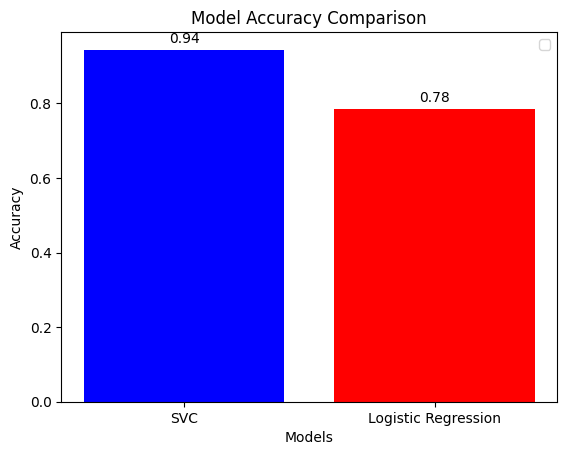

In [ ]:
import matplotlib.pyplot as plt

# Define the accuracy scores for each model
model_a_accuracy = svm_score
model_b_accuracy = logmod_acc

# Set up the bar chart
fig, ax = plt.subplots()
models = ['SVC', 'Logistic Regression']
accuracy_scores = [model_a_accuracy, model_b_accuracy]
bar_colors = ['blue', 'red']

# Create the bars
rects = ax.bar(models, accuracy_scores, color=bar_colors)

# Add labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracy Comparison')

# Add the accuracy scores as labels on the bars
for rect in rects:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

# Add a legend
ax.legend()

# Show the plot
plt.show()

**As depicted from the above chart, the SVC model performed much better than the Logistic Regression model in terms of accuracy.**

###**Model Area Under the ROC Curve Comparison**

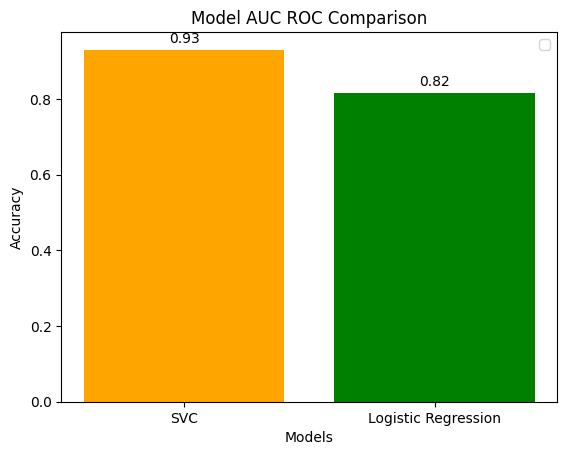

In [ ]:
# Define the accuracy scores for each model
model_a_accuracy = roc_auc
model_b_accuracy = roc_auc_log

# Set up the bar chart
fig, ax = plt.subplots()
models = ['SVC', 'Logistic Regression']
accuracy_scores = [model_a_accuracy, model_b_accuracy]
bar_colors = ['orange', 'green']

# Create the bars
rects = ax.bar(models, accuracy_scores, color=bar_colors)

# Add labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Model AUC ROC Comparison')

# Add the accuracy scores as labels on the bars
for rect in rects:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

# Add a legend
ax.legend()

# Show the plot
plt.show()

**Shown here again, the SVC model performed much better than the Logistic Regression model in terms of the area of under the ROC curve as well. We believe the SVC model was better suited for the dataset and the hyper-parameter optimization functions we implemented increased the accuracy to make this an excellent model.**